In [76]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [77]:
A = np.ones((6, 6))
A[:,:2] = A[:,:2]*2
A[:,2:4] = A[:,2:4]*3
A[:,4:] = A[:,4:]*4

print(A)

[[2. 2. 3. 3. 4. 4.]
 [2. 2. 3. 3. 4. 4.]
 [2. 2. 3. 3. 4. 4.]
 [2. 2. 3. 3. 4. 4.]
 [2. 2. 3. 3. 4. 4.]
 [2. 2. 3. 3. 4. 4.]]


In [78]:
our_map = 'hot'
our_map = 'gray'
our_map = None


In [79]:
U, S, VT = np.linalg.svd(A)
S = np.diag(S)
print("Before truncating:")
print("U = \n", np.round(U, 2))
print("S = \n", np.round(S, 2))
print("VT = \n", np.round(VT, 2))

Before truncating:
U = 
 [[-0.41  0.91 -0.    0.   -0.   -0.  ]
 [-0.41 -0.18  0.89 -0.   -0.   -0.  ]
 [-0.41 -0.18 -0.22 -0.5  -0.5  -0.5 ]
 [-0.41 -0.18 -0.22 -0.17 -0.17  0.83]
 [-0.41 -0.18 -0.22 -0.17  0.83 -0.17]
 [-0.41 -0.18 -0.22  0.83 -0.17 -0.17]]
S = 
 [[18.65  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]]
VT = 
 [[-0.26 -0.26 -0.39 -0.39 -0.53 -0.53]
 [-0.85 -0.03  0.37  0.37 -0.06 -0.06]
 [ 0.44 -0.48  0.44  0.44 -0.31 -0.31]
 [ 0.   -0.    0.5  -0.5  -0.5   0.5 ]
 [ 0.   -0.    0.5  -0.5   0.5  -0.5 ]
 [ 0.14  0.83  0.14  0.14 -0.35 -0.35]]


In [80]:
def draw_svd(A, U, S, VT, our_map):
    plt.subplot(221 )
    plt.title('Original matrix')
    plt.imshow(A, cmap =our_map)
    plt.axis('off')
    plt.subplot(222)
    plt.title('U  matrix')
    plt.imshow(U, cmap =our_map)
    plt.axis('off')
    plt.subplot(223)
    plt.title('Sigma matrix')
    plt.imshow(S, cmap =our_map)
    plt.axis('off')
    plt.subplot(224)
    plt.title('V matrix')
    plt.imshow(VT, cmap =our_map)
    plt.axis('off')

In [81]:
def truncate_u_v(S, U, VT):
    threshold = 0.1
    s = np.diag(S)
    index = s < threshold

    U[:,index] = 0
    VT[index,:]=0
    return U, VT

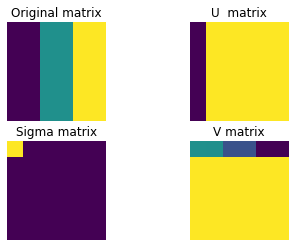

In [82]:
Utrunc, VTtrunc = truncate_u_v(S, U, VT)
draw_svd(A, U, S, VT, our_map) 

In [83]:
print("After truncation:")
print("Utrunc = \n", np.round(Utrunc, 2))
print("S = \n", np.round(S, 2))
print("VTtrunc = \n", np.round(VTtrunc, 2))

After truncation:
Utrunc = 
 [[-0.41  0.    0.    0.    0.    0.  ]
 [-0.41  0.    0.    0.    0.    0.  ]
 [-0.41  0.    0.    0.    0.    0.  ]
 [-0.41  0.    0.    0.    0.    0.  ]
 [-0.41  0.    0.    0.    0.    0.  ]
 [-0.41  0.    0.    0.    0.    0.  ]]
S = 
 [[18.65  0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]]
VTtrunc = 
 [[-0.26 -0.26 -0.39 -0.39 -0.53 -0.53]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.  ]]


In [84]:
Atruncated = Utrunc @ S @ VTtrunc
Atruncated

array([[2., 2., 3., 3., 4., 4.],
       [2., 2., 3., 3., 4., 4.],
       [2., 2., 3., 3., 4., 4.],
       [2., 2., 3., 3., 4., 4.],
       [2., 2., 3., 3., 4., 4.],
       [2., 2., 3., 3., 4., 4.]])

In [85]:
Atruncated - A

array([[ 4.44089210e-16,  2.22044605e-15,  1.33226763e-15,
         1.33226763e-15,  2.66453526e-15,  2.66453526e-15],
       [-4.44089210e-16,  1.33226763e-15,  0.00000000e+00,
         0.00000000e+00,  8.88178420e-16,  8.88178420e-16],
       [-4.44089210e-16,  1.33226763e-15,  0.00000000e+00,
         0.00000000e+00,  8.88178420e-16,  8.88178420e-16],
       [-4.44089210e-16,  1.33226763e-15,  0.00000000e+00,
         0.00000000e+00,  8.88178420e-16,  8.88178420e-16],
       [-4.44089210e-16,  1.33226763e-15,  0.00000000e+00,
         0.00000000e+00,  8.88178420e-16,  8.88178420e-16],
       [-4.44089210e-16,  1.33226763e-15,  0.00000000e+00,
         0.00000000e+00,  8.88178420e-16,  8.88178420e-16]])

Above we see almost a zero matrix because the original matrix A was of rank 1

In [86]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

X = faces.data
# The images are of size 64 x 64
X.shape

(400, 4096)

In [87]:
face = X[100,:].reshape((64,64))

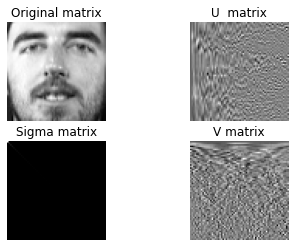

In [88]:
# we decompose the image of a face
U, S, VT = np.linalg.svd(face)
S = np.diag(S)
face = face.astype('float')
#U, VT = truncate_u_v(S, U, VT)
draw_svd(face, U, S, VT, 'gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

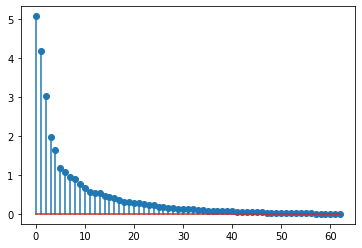

In [89]:
diag_elem = np.diag(S)
plt.stem(diag_elem[1:])

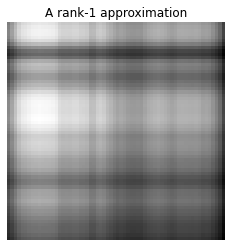

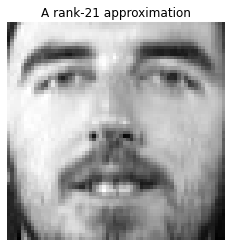

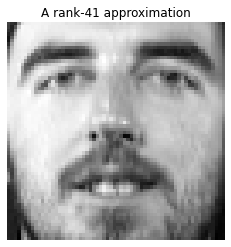

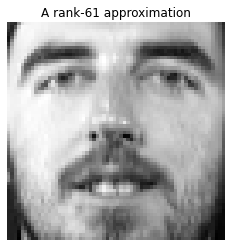

In [90]:
for r in range(1, 64, 20):
    img_r = np.matmul(U[:,:r] , S[:r,:r]) 
    img_r = np.matmul (img_r , VT[:r,:])

    plt.title(f"A rank-{r} approximation")
    plt.imshow(img_r, cmap = 'gray')
    # filename = "image_" + str(r).zfill(3) + ".jpg"
    plt.axis('off')
    plt.show()
    # plt.savefig(filename)